In [1]:
import pandas as pd

In [5]:
df_list = []

for seed in range(123, 128):
    df_list.append(pd.read_csv(
        f"../../outputs/results/230308finding_type_validation_seed{seed}_epoch5.csv"
    ))


In [7]:
model_name = ["Control"] + ["Head"] + [f"Block {7-i}" for i in range(7)] + ["Full"]
layer_name = ["Stem"] + [f"Block {i+1}" for i in range(7)] + ["Head"]

In [10]:
df_list[0]

,model,layer,pathological findings,AUROC,MCC,Balanced Accuracy,AP
0,Control,Stem,"Proliferation, bile duct",0.896421,0.230107,0.579122,0.464976
1,Control,Block 1,"Proliferation, bile duct",0.938158,0.638737,0.839545,0.581823
2,Control,Block 2,"Proliferation, bile duct",0.968936,0.782962,0.950758,0.817201
3,Control,Block 3,"Proliferation, bile duct",0.972933,0.766453,0.930717,0.852656
4,Control,Block 4,"Proliferation, bile duct",0.972741,0.768363,0.932572,0.850484
...,...,...,...,...,...,...,...
723,Full,Block 5,Swelling,0.962771,0.671383,0.773613,0.912767
724,Full,Block 6,Swelling,0.954892,0.732020,0.817849,0.908298
725,Full,Block 7,Swelling,0.941907,0.682760,0.784381,0.889740
726,Full,Head,Swelling,0.944356,0.725320,0.806388,0.919184


In [11]:
def return_scores(df, metrics):
    scores = []
    for i, model in enumerate(model_name):
        for j, layer in enumerate(layer_name):
            if i+j >= 9:
                scores.append(df[(df["model"] == model) & (df["layer"] == layer)][metrics].to_numpy()[0])
    return scores

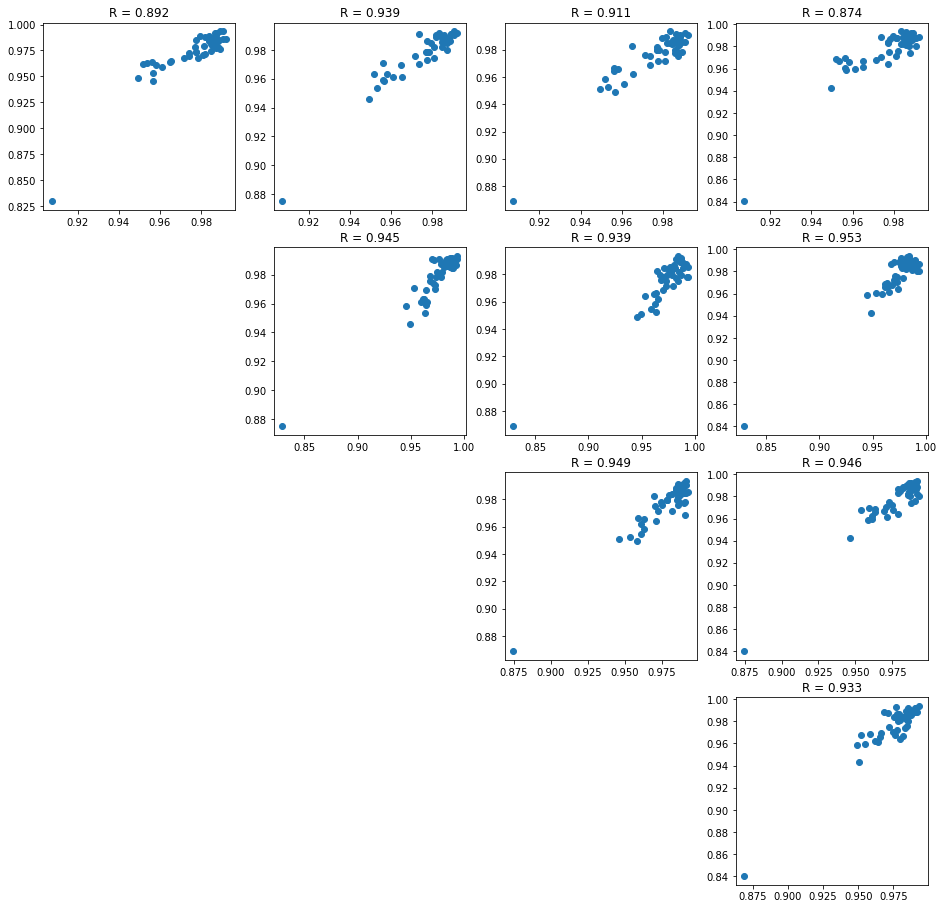

In [22]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,20))
for i in range(5):
    for j in range(5):
        if i<j:
            r = np.corrcoef(return_scores(df_list[i], "AUROC"), return_scores(df_list[j], "AUROC"))[0, 1]
            ax = plt.subplot(5, 5, 5*i+j+1)
            ax.set_title(f"R = {r:.3f}")
            ax.scatter(return_scores(df_list[i], "AUROC"), return_scores(df_list[j], "AUROC"))

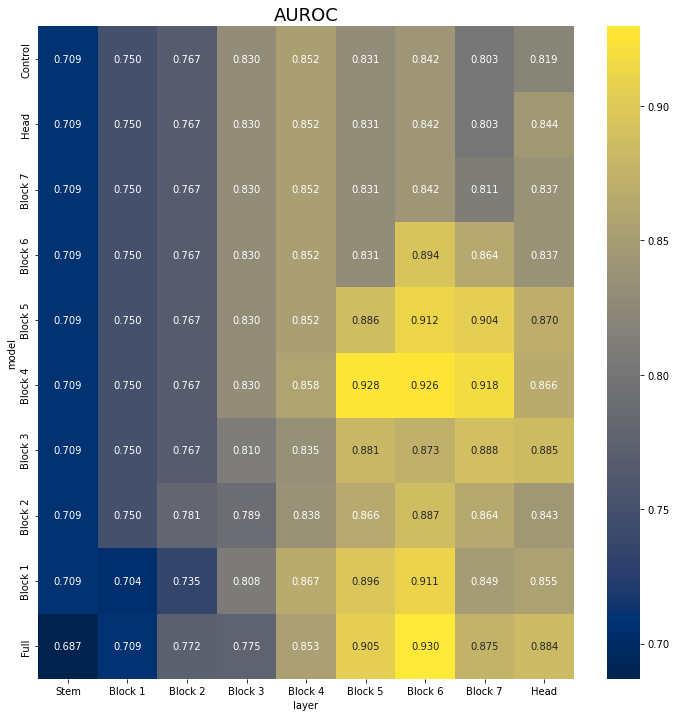

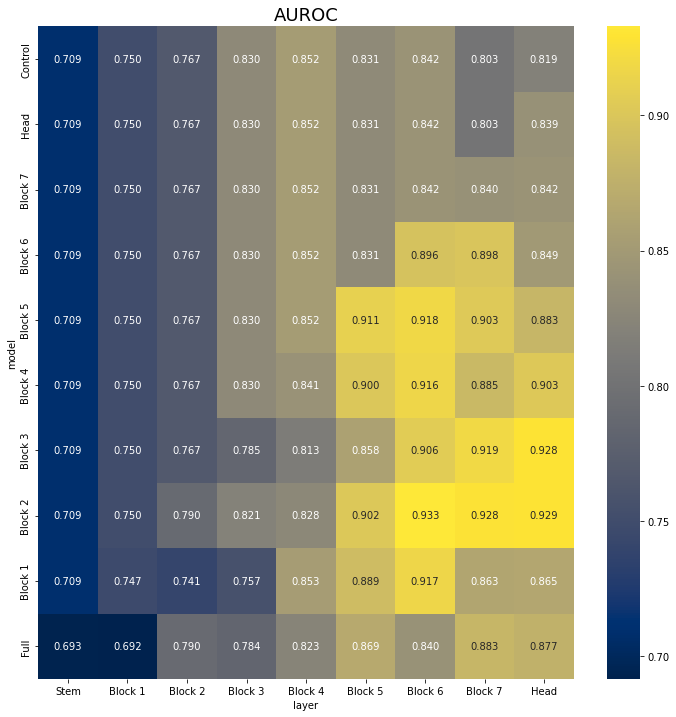

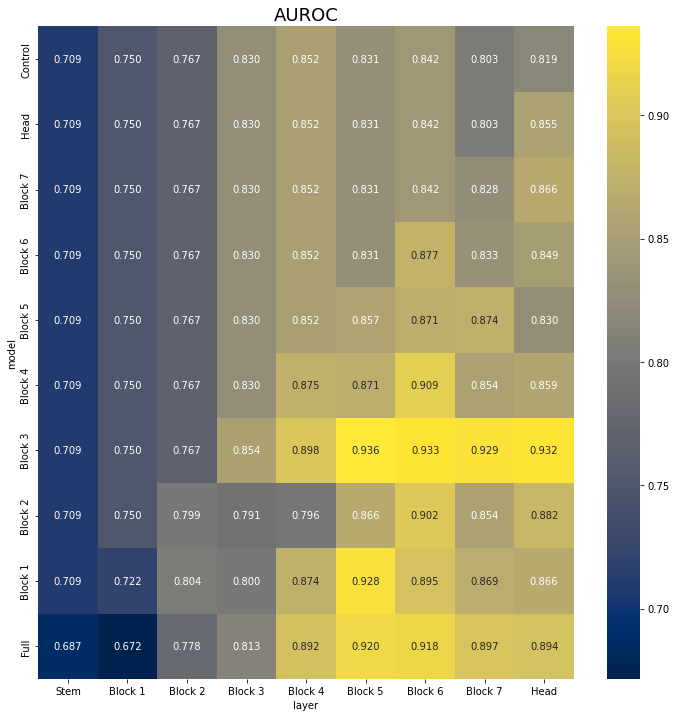

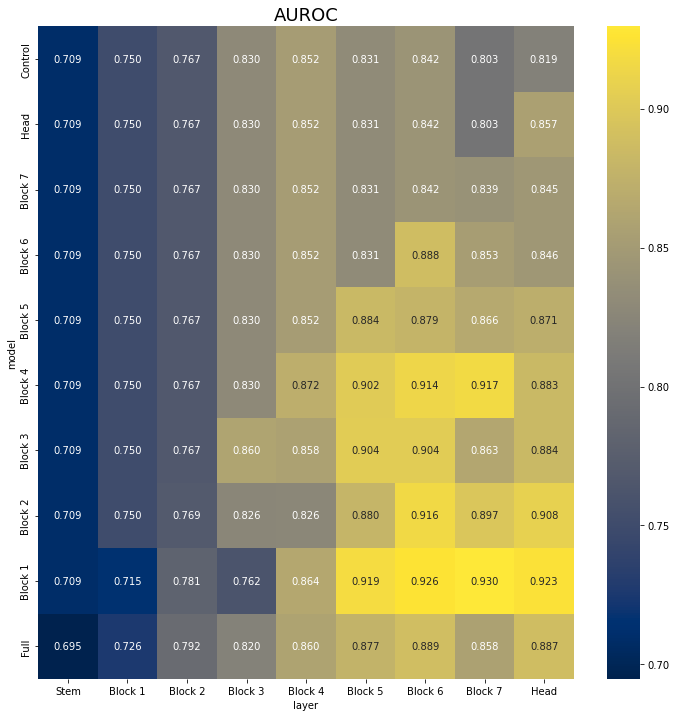

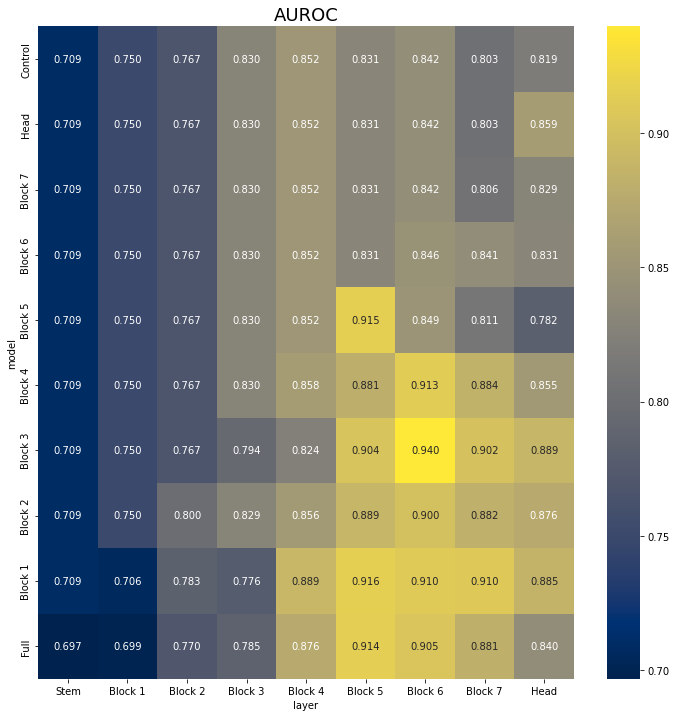

In [24]:
import seaborn as sns
for i in range(5):
    df = pd.pivot_table(df_list[i],
                        index="model", columns="layer", values="AUROC")[layer_name].reindex(index=model_name)
    plt.figure(figsize=(12, 12))
    plt.title("AUROC", fontsize=18)
    sns.heatmap(df, cmap="cividis", annot=True, fmt=".3f")
    plt.show()


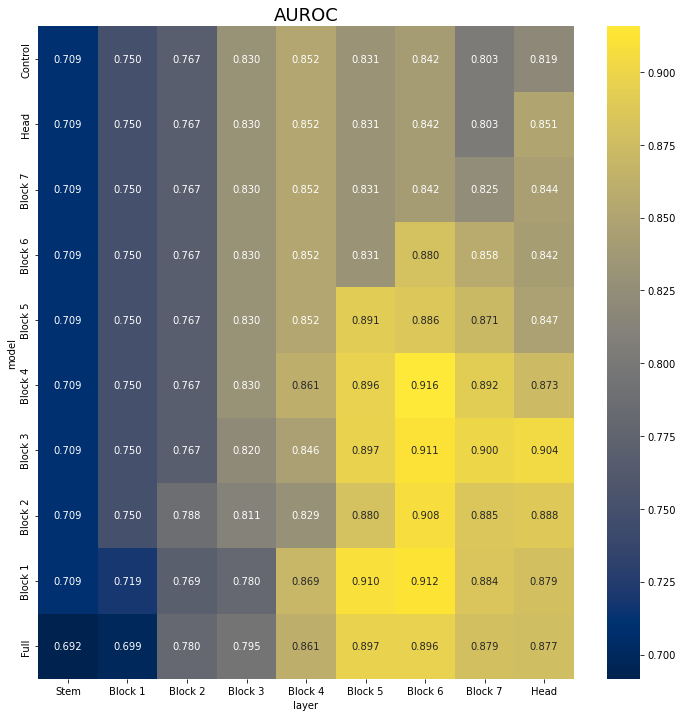

In [25]:
mn = 0
for i in range(5):
    df = pd.pivot_table(df_list[i],
                        index="model", columns="layer", values="AUROC")[layer_name].reindex(index=model_name)
    mn += df
mn /= 5
plt.figure(figsize=(12, 12))
plt.title("AUROC", fontsize=18)
sns.heatmap(mn, cmap="cividis", annot=True, fmt=".3f")
plt.show()


In [26]:
RMSEで中立的なものを出す

mean absolute MAD

中立的なものについてデータをまとめる

他は、raw dataは作っておく

NameError: name 'RMSEで中立的なものを出す' is not defined